In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import cv2
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model

In [2]:
data=np.zeros((5631,128,128,3))
label=np.zeros((5631))
count=0

for file in os.listdir("data/green_area"):
    img = plt.imread('data/green_area/'+file)
    img_t=cv2.resize(img,dsize=(128,128))
    data[count]=img_t
    label[count]=0
    count+=1

for file in os.listdir("data/water"):
    img = plt.imread('data/water/'+file)
    img_t=cv2.resize(img,dsize=(128,128))
    data[count]=img_t
    label[count]=1
    count+=1

for file in os.listdir("data/desert"):
    img = plt.imread('data/desert/'+file)
    img_t=cv2.resize(img,dsize=(128,128))
    data[count]=img_t
    label[count]=2
    count+=1

for file in os.listdir("data/cloudy"):
    img = plt.imread('data/cloudy/'+file)[:,:,:3]
    img_t=cv2.resize(img,dsize=(128,128))
    data[count]=img_t
    label[count]=3
    count+=1

In [3]:
y=np.zeros((label.shape[0],4),dtype='i')
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        if(label[i]==j):
            y[i,j]=1

In [4]:
data=data/255.0

In [5]:
idx=np.random.permutation(data.shape[0])

In [6]:
train=np.copy(data)
test=np.copy(y)
train,test=train[idx],test[idx]

In [7]:
x_train=train[:4400]
y_train=test[:4400]
x_valid=train[4400:]
y_valid=test[4400:]

In [8]:
input_shape=(128,128,3)

In [9]:
cnn=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax')]
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=20

In [12]:
cnn.fit(x_train,y_train,
        epochs=epochs,
       )

Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.6152 - loss: 0.9170
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.7983 - loss: 0.4446
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.8409 - loss: 0.3742
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.8579 - loss: 0.3392
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.8597 - loss: 0.3553
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.8707 - loss: 0.3110
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.8808 - loss: 0.2783
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.8921 - loss: 0.2724
Epoch 9/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.8767 - loss: 0.2905
Epoch 10/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.8877 - loss: 0.2802
Epoch 11/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.8993 - loss: 0.2546
Epoch 12/20
138/138

In [13]:
cnn.evaluate(x_valid,y_valid)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9255 - loss: 0.1852


[0.17298340797424316, 0.9309504628181458]

In [14]:
y_predict=cnn.predict(x_valid)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


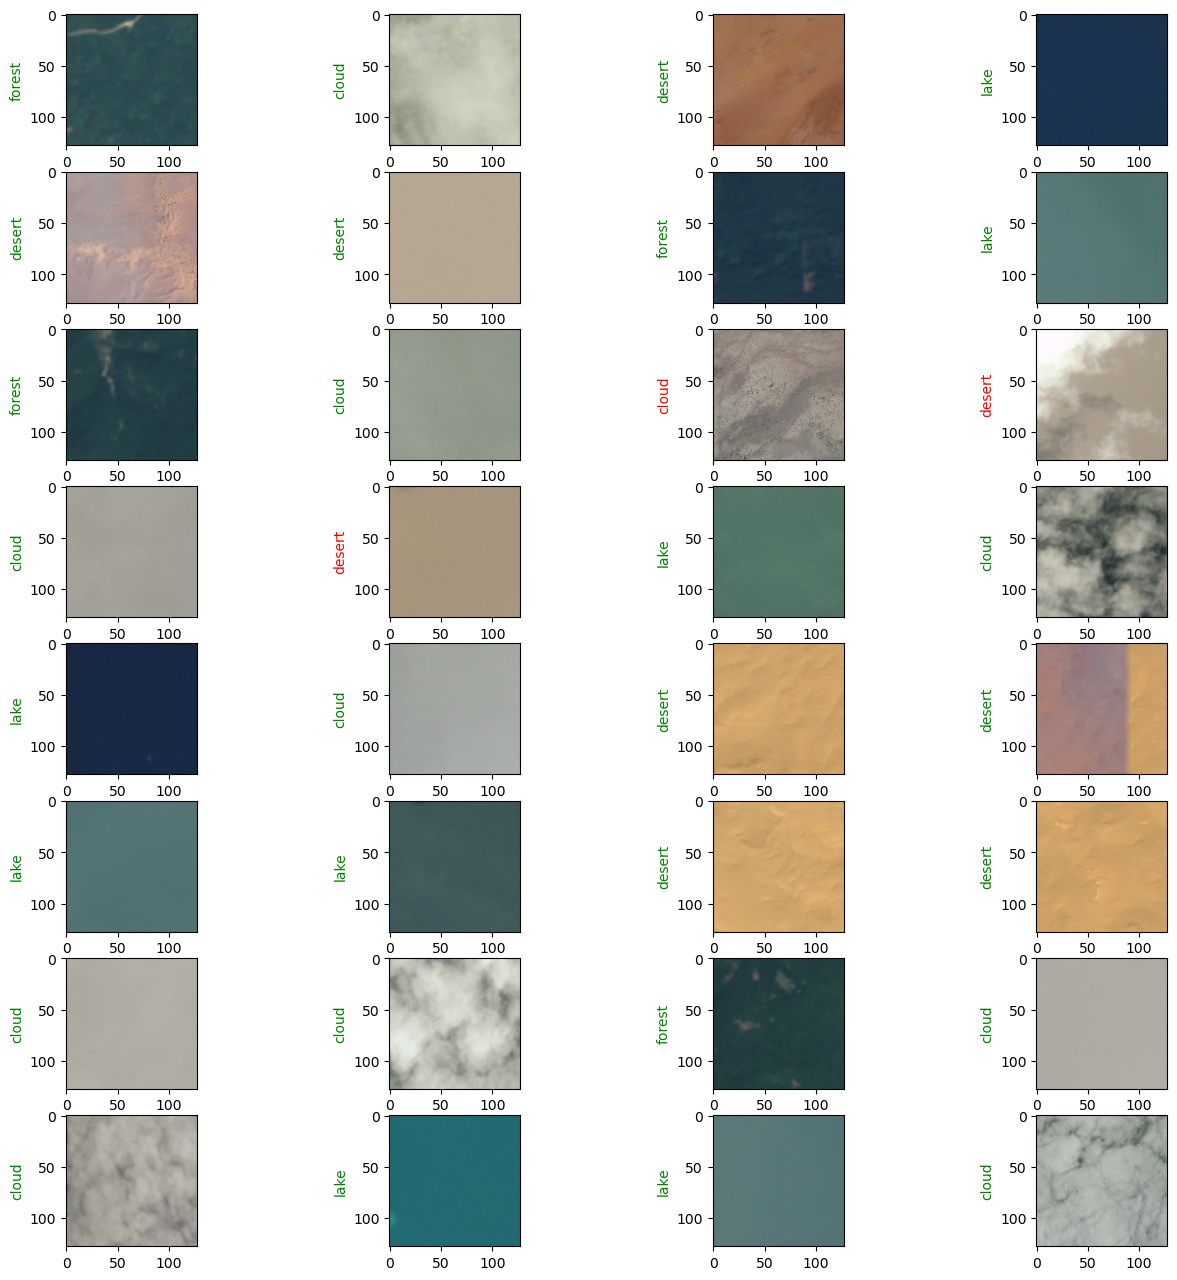

In [15]:
fig=plt.figure(figsize=(16,16))
c=4
r=8
ax=[]
for i in range(1,c*r+1):
    ax.append(fig.add_subplot(8,4,i))
    if(y_predict[i].argmax()==0):
        if(y_valid[i].argmax()==0):
            ax[-1].yaxis.label.set_color('green')
            plt.ylabel("forest")
        else:
            ax[-1].yaxis.label.set_color('red')
            plt.ylabel("forest")
    elif(y_predict[i].argmax()==1):
        if(y_valid[i].argmax()==1):
            ax[-1].yaxis.label.set_color('green')
            plt.ylabel("lake")
        else:
            ax[-1].yaxis.label.set_color('red')
            plt.ylabel("lake")
    elif(y_predict[i].argmax()==2):
        if(y_valid[i].argmax()==2):
            ax[-1].yaxis.label.set_color('green')
            plt.ylabel("desert")
        else:
            ax[-1].yaxis.label.set_color('red')
            plt.ylabel("desert")
    elif(y_predict[i].argmax()==3):
        if(y_valid[i].argmax()==3):
            ax[-1].yaxis.label.set_color('green')
            plt.ylabel("cloud")
        else:
            ax[-1].yaxis.label.set_color('red')
            plt.ylabel("cloud")
    plt.imshow(x_valid[i])
plt.show()